In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("../dataset/penguins.csv")  # Adjust path if needed

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [7]:
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [8]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


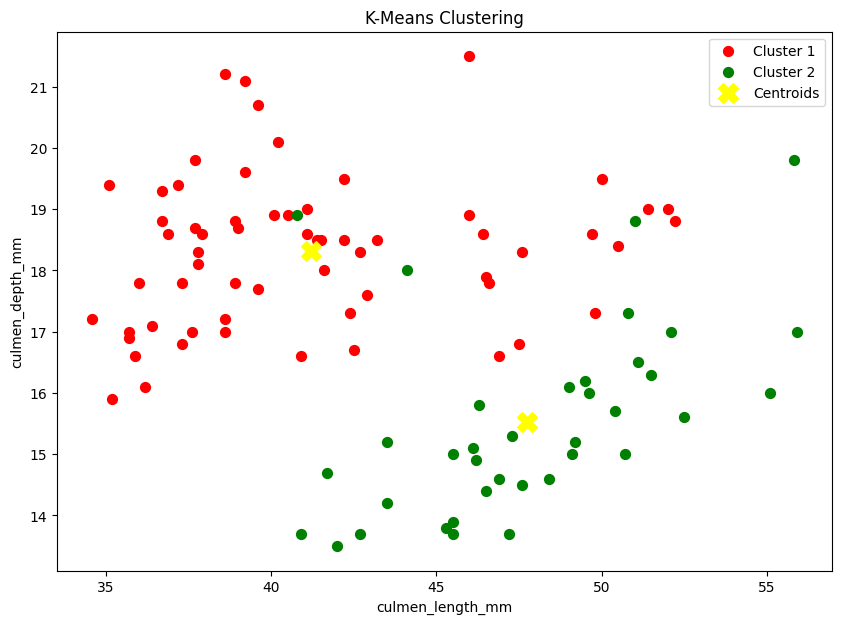

In [25]:
def kmeans(data, k=3, max_iterations=7, tolerance=1e-4):
    np.random.seed(42)
    # Initialize centroids by randomly selecting k data points
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each data point to the closest centroid
        clusters = np.array([
            np.argmin([np.linalg.norm(point - centroid) for centroid in centroids])
            for point in data
        ])
        
        # Recompute centroids as the mean of all points in a cluster
        new_centroids = np.array([
            data[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i]
            for i in range(k)
        ])
        
        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break
        centroids = new_centroids
        
    return clusters, centroids

# Run k-means algorithm
clusters, centroids = kmeans(data, k=3)

# Plot cluster
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b']

for i in range(2):
    points = data[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
    
# Display centroids
plt.scatter(centroids[:2, 0], centroids[:2, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('K-Means Clustering')
plt.legend()
plt.show()